In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

**Load the Titanic Dataset. [Original link](https://www.kaggle.com/datasets/yasserh/titanic-dataset)**

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

**Display the first 7 elements of the dataset**

In [3]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**Summary of the dataset, including column names and missing values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Reveals that columns 'Age', 'Cabin' and 'Embarked' have some missing values*

**Statistical summary of numerical columns**

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*Fare has wide price range*

**Conclusion:** 
- ***Some columns like Age, Cabin, Embarked have missing data***
- ***Fare has a wide range, indicating significant variability in pasenger ticket prices***

**Handling Missing Data**

**Check how many missing values in each column**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Cabin has the most missing values*

**Fill missing values in Age with median values**

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\mrfor\AppData\Local\Temp\ipykernel_9248\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Drop irrelevant columns that won't add value to analysis or modeling**

In [8]:
df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

**Drop rows where Embarked is missing**

In [9]:
df.dropna(subset=['Embarked'], inplace=True)

**Verify that missing values have been handled**

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Conclusion:** 
- ***Missing values were replaced with the median for a balanced result***
- ***Columns 'PassengerId', 'Ticket', 'Cabin' were removed as they don't contribute to predictions or insights***

**Visualize Data Distribution**

**Visualize the survival count**

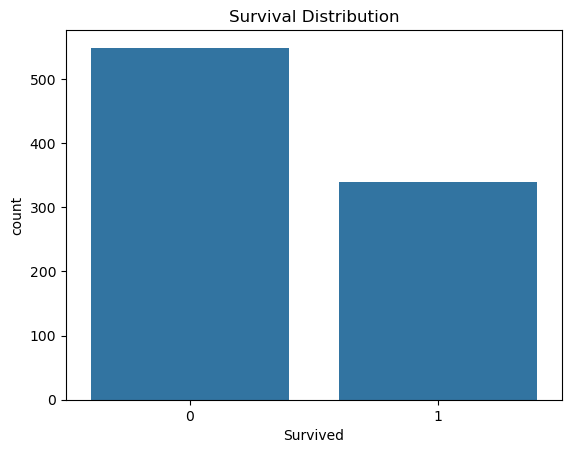

In [11]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

*More people died than survived*

**Age distribution**

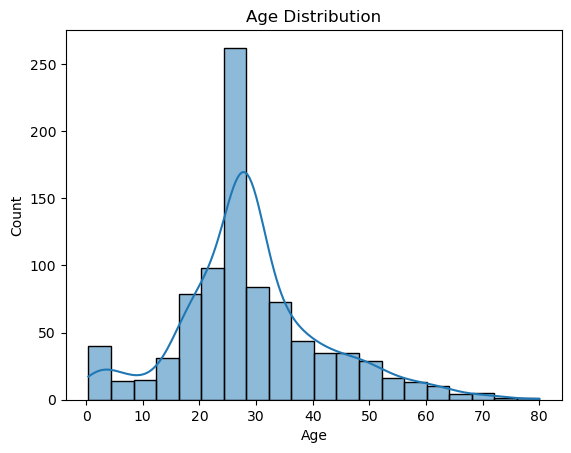

In [12]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

*Most passengers were aged 20-40*

**Correlation heatmap between numerical features**

In [13]:
#before creating a cmap
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) # map numerical values
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # get dummies (True/False values) for embarked

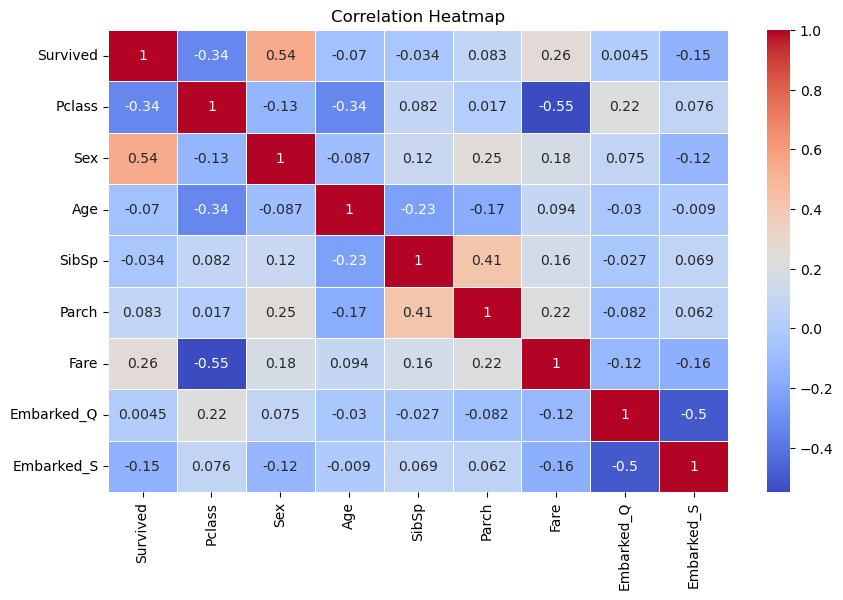

In [14]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Analyze Categorical Features**

**Gender and Survival**

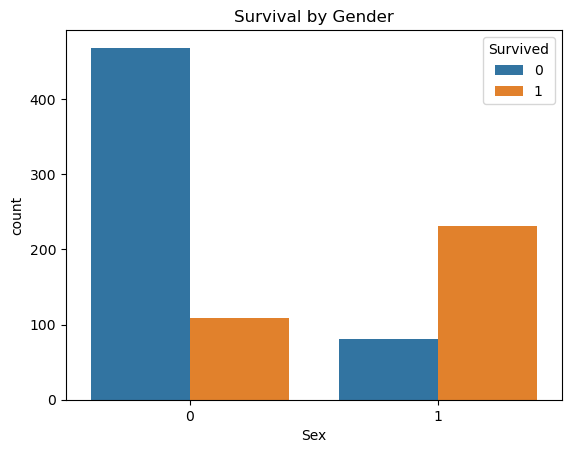

In [15]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

*Females had significantly higher chance of survival*

**Class and Survival**

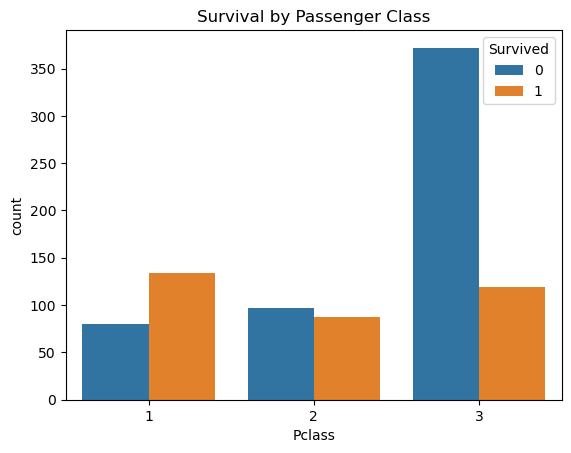

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

*Passengers in first class had higher survival chance compared to other classes**

**Split Data for Training and Testing**

In [17]:
from sklearn.model_selection import train_test_split

#Define features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

#Split the data in to train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Display the shapes of train/test sets
X_train.shape, X_test.shape

((711, 8), (178, 8))

**Train and Evaluate a Logistic Regression Model**

**Scale the Features**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)

#Evaluate model performance
print('Accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7696629213483146
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



**Prediction on new data**

In [23]:
new_data = pd.DataFrame({
    'Pclass': [3,1], 
    'Sex': [0,1],
    'Age': [25,38],
    'SibSp': [0,1],
    'Parch': [0,0],
    'Fare': [7.25,71.28],
    'Embarked_Q': [0,0],
    'Embarked_S': [1,0]
})

new_data_scaled = scaler.transform(new_data)

predictions = model.predict(new_data_scaled)

print('Predictions: ', predictions) #0 - didn't survive, 1 - survived

Predictions:  [0 1]
